## Exploratory data analysis of toyota used cars using pivto table and barplot

Ariful Islam<br>
Graduate Mechanical Enginner<br>
Chittagong University of Engineering & Technology<br>

**Objectives:**

- What are the top 5 selling car models/transmission/fuelType in the dataset?
- What's the average selling price of the top 5 selling car models/transmission/fuelType?
- What's the total sale of the top 5 selling car models/transmission/fuelType?

Data Source: https://github.com/SKawsar/Data_Visualization_with_Python/tree/main

**Importing necessary libraries**

In [227]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context('talk')
sns.set_style('darkgrid')

from sklearn.preprocessing import LabelEncoder

**Reading the dataset**

In [228]:
df=pd.read_csv("C:/Users/Arif/Documents/Data viz and analysis/data-vis-practice/class_lecture_files/toyota.csv")
df.head()

,model,year,price,transmission,mileage,fuelType,mpg,engineSize
0,GT86,2016,16000,Manual,24089,Petrol,36.2,2.0
1,GT86,2017,15995,Manual,18615,Petrol,36.2,2.0
2,GT86,2015,13998,Manual,27469,Petrol,36.2,2.0
3,GT86,2017,18998,Manual,14736,Petrol,36.2,2.0
4,GT86,2017,17498,Manual,36284,Petrol,36.2,2.0


In [229]:
display(df.info())
display(df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6738 entries, 0 to 6737
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         6738 non-null   object 
 1   year          6738 non-null   int64  
 2   price         6738 non-null   int64  
 3   transmission  6738 non-null   object 
 4   mileage       6738 non-null   int64  
 5   fuelType      6738 non-null   object 
 6   mpg           6738 non-null   float64
 7   engineSize    6738 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 421.2+ KB


None

(6738, 8)

In [230]:
df.isnull()

,model,year,price,transmission,mileage,fuelType,mpg,engineSize
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
6733,False,False,False,False,False,False,False,False
6734,False,False,False,False,False,False,False,False
6735,False,False,False,False,False,False,False,False
6736,False,False,False,False,False,False,False,False


In [231]:
# data aggregration, based on model
df.groupby('model').agg('count')

,year,price,transmission,mileage,fuelType,mpg,engineSize
model,,,,,,,
Auris,712,712,712,712,712,712,712
Avensis,115,115,115,115,115,115,115
Aygo,1961,1961,1961,1961,1961,1961,1961
C-HR,479,479,479,479,479,479,479
Camry,11,11,11,11,11,11,11
Corolla,267,267,267,267,267,267,267
GT86,73,73,73,73,73,73,73
Hilux,86,86,86,86,86,86,86
IQ,8,8,8,8,8,8,8


In [232]:
# based on price
df.groupby('model')['price'].agg('count')

model
 Auris             712
 Avensis           115
 Aygo             1961
 C-HR              479
 Camry              11
 Corolla           267
 GT86               73
 Hilux              86
 IQ                  8
 Land Cruiser       51
 PROACE VERSO       15
 Prius             232
 RAV4              473
 Supra              12
 Urban Cruiser       4
 Verso             114
 Verso-S             3
 Yaris            2122
Name: price, dtype: int64

In [233]:
df.describe(include=object)

,model,transmission,fuelType
count,6738,6738,6738
unique,18,4,4
top,Yaris,Manual,Petrol
freq,2122,3826,4087


In [234]:
# based on transmission
df.groupby('transmission')['price'].agg('count')

transmission
Automatic    2657
Manual       3826
Other           1
Semi-Auto     254
Name: price, dtype: int64

In [235]:
# based on fuelType
df.groupby('fuelType')['price'].agg('count')

fuelType
Diesel     503
Hybrid    2043
Other      105
Petrol    4087
Name: price, dtype: int64

**Top 5 selling car models based on model**

In [236]:
df_pivot=pd.pivot_table(df, index='model', values='price', aggfunc=['count', 'sum', 'mean'])
display(df_pivot.sort_values(('count', 'price'),ascending=False))

,count,sum,mean
,price,price,price
model,,,
Yaris,2122,22393644,10553.083883
Aygo,1961,15502518,7905.414584
Auris,712,8905633,12507.911517
C-HR,479,9892088,20651.540710
RAV4,473,8590181,18161.059197
Corolla,267,5591710,20942.734082
Prius,232,4407732,18998.844828
Avensis,115,1136701,9884.356522


So top 5 best selling models are Yaris, Aygo, Auris, C-HR, RAV4<br>
Average prices are 10553, 7905,12507,20651,18161 dollar respectively<br>
Total sales are 2.239, 1.550, 0.890, 0.989 0.851 million dollars respectively

**Top selling car model based on transmission**

In [237]:
df_pivot2=pd.pivot_table(df, index='transmission', values='price', aggfunc=['count', 'sum', 'mean'])
display(df_pivot2.sort_values(('count', 'price'),ascending=False))

,count,sum,mean
,price,price,price
transmission,,,
Manual,3826,36544027,9551.496864
Automatic,2657,44060576,16582.828754
Semi-Auto,254,3758473,14797.137795
Other,1,12795,12795.000000


so manual cars are the best selling ones<br>
They are best selling cause their average price is less due to less cost of manual transmission system

**Top selling car model based on fuelType**

In [238]:
df_pivot3=pd.pivot_table(df, index='fuelType', values='price', aggfunc=['count', 'sum', 'mean'])
display(df_pivot3.sort_values(('count', 'price'),ascending=False))

,count,sum,mean
,price,price,price
fuelType,,,
Petrol,4087,39887231,9759.537803
Hybrid,2043,35109921,17185.472834
Diesel,503,7895997,15697.807157
Other,105,1482722,14121.161905


So petrol cars are the top selling ones

**Barplot**<br>
Based on model

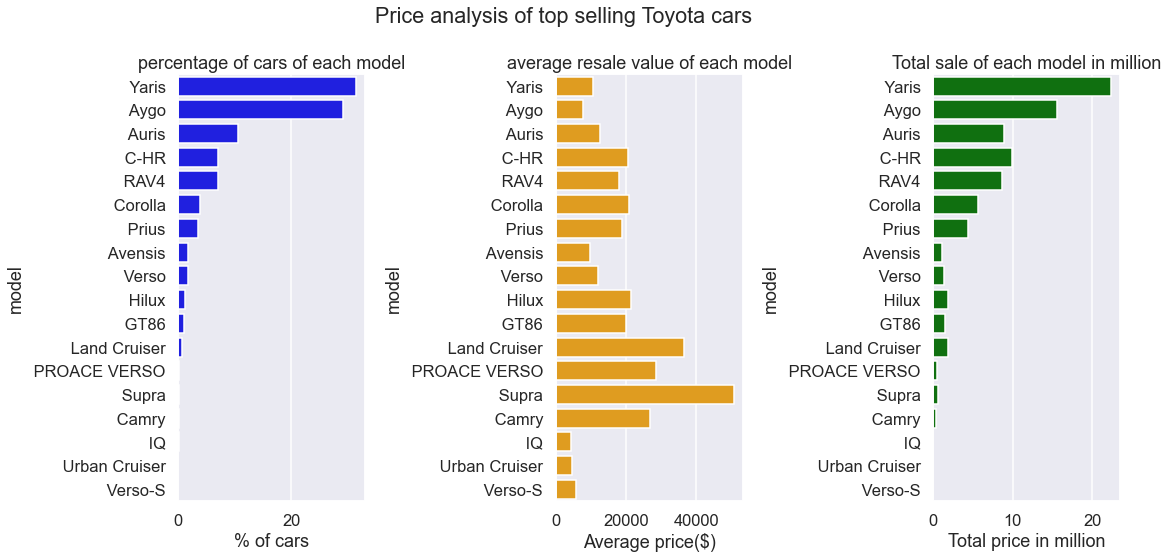

In [239]:
df_agg=df.groupby('model')['price'].agg(['count','mean', 'sum'])
df_agg=df_agg.sort_values('count', ascending=False)

df_agg['count']=df_agg['count']/df_agg['count'].sum()*100
df_agg['sum']=df_agg['sum']/1000000
df_agg=df_agg.round(2)
plt.figure(figsize=(16,8))

plt.subplot(1,3,1)
sns.barplot(x='count', y=df_agg.index, data=df_agg, color='blue')
plt.title("percentage of cars of each model")
plt.xlabel("% of cars")

plt.subplot(1,3,2)
sns.barplot(x='mean', y=df_agg.index, data=df_agg, color='orange')
plt.title("average resale value of each model")
plt.xlabel("Average price($)")

plt.subplot(1,3,3)
sns.barplot(x='sum', y=df_agg.index, data=df_agg, color='green')
plt.title("Total sale of each model in million")
plt.xlabel("Total price in million")

plt.suptitle('Price analysis of top selling Toyota cars')
plt.tight_layout()
plt.show()

Based on transmission

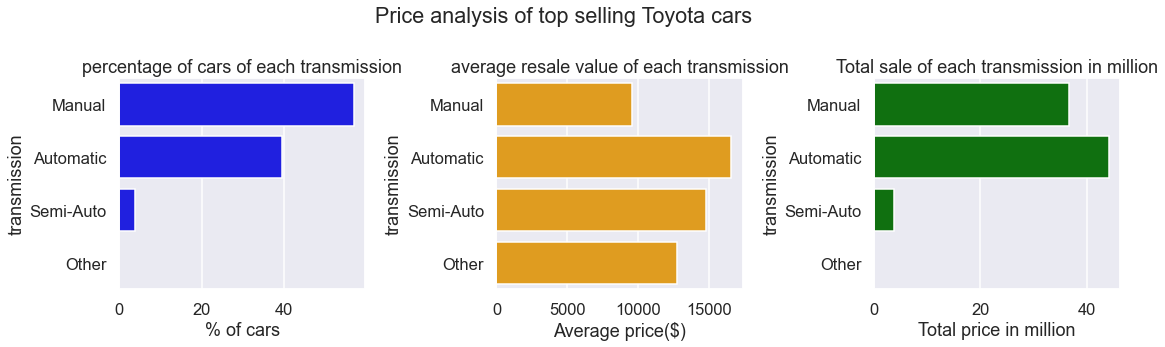

In [240]:
df_agg2=df.groupby('transmission')['price'].agg(['count','mean', 'sum'])
df_agg2=df_agg2.sort_values('count', ascending=False)

df_agg2['count']=df_agg2['count']/df_agg2['count'].sum()*100
df_agg2['sum']=df_agg2['sum']/1000000
df_agg2=df_agg2.round(2)
plt.figure(figsize=(16,5))

plt.subplot(1,3,1)
sns.barplot(x='count', y=df_agg2.index, data=df_agg2, color='blue')
plt.title("percentage of cars of each transmission")
plt.xlabel("% of cars")

plt.subplot(1,3,2)
sns.barplot(x='mean', y=df_agg2.index, data=df_agg2, color='orange')
plt.title("average resale value of each transmission")
plt.xlabel("Average price($)")

plt.subplot(1,3,3)
sns.barplot(x='sum', y=df_agg2.index, data=df_agg2, color='green')
plt.title("Total sale of each transmission in million")
plt.xlabel("Total price in million")

plt.suptitle('Price analysis of top selling Toyota cars')
plt.tight_layout()
plt.show()

Based on fuelType

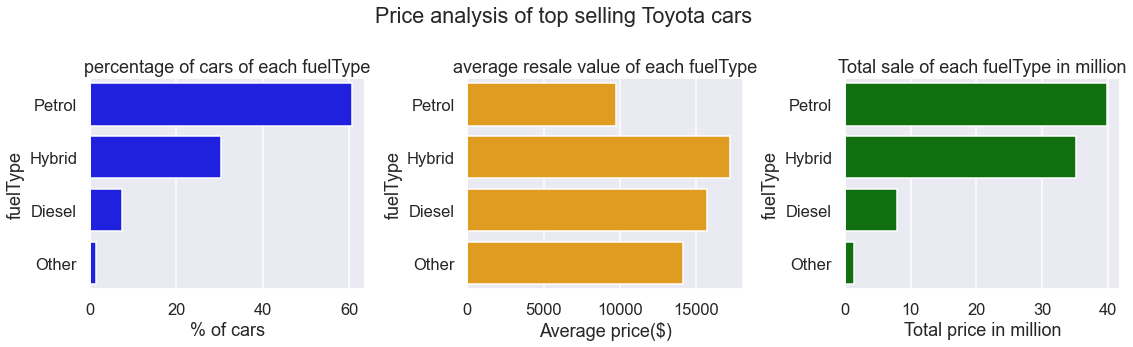

In [241]:
df_agg3=df.groupby('fuelType')['price'].agg(['count','mean', 'sum'])
df_agg3=df_agg3.sort_values('count', ascending=False)

df_agg3['count']=df_agg3['count']/df_agg3['count'].sum()*100
df_agg3['sum']=df_agg3['sum']/1000000
df_agg3=df_agg3.round(2)
plt.figure(figsize=(16,5))

plt.subplot(1,3,1)
sns.barplot(x='count', y=df_agg3.index, data=df_agg3, color='blue')
plt.title("percentage of cars of each fuelType")
plt.xlabel("% of cars")

plt.subplot(1,3,2)
sns.barplot(x='mean', y=df_agg3.index, data=df_agg3, color='orange')
plt.title("average resale value of each fuelType")
plt.xlabel("Average price($)")

plt.subplot(1,3,3)
sns.barplot(x='sum', y=df_agg3.index, data=df_agg3, color='green')
plt.title("Total sale of each fuelType in million")
plt.xlabel("Total price in million")

plt.suptitle('Price analysis of top selling Toyota cars')
plt.tight_layout()
plt.show()